In [1]:
import cptac
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import Delta_Correlation as dc
from statannot import add_stat_annotation
import numpy as np

cptac warning: Your version of cptac (0.9.1) is out-of-date. Latest is 0.9.4. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-e1b5d5b08e24>, line 1)


In [2]:
luad = cptac.Luad()

In [3]:
df = dc.get_prot_trans_df(luad)
df.Tissue = [tissue.title() for tissue in df.Tissue]
df = df.rename(columns = {'Proteomics': 'Protein Abundance', 'Transcriptomics': 'RNA Abundance'})

cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps\Delta_Correlation.py, line 26)
cptac warning: Due to dropping the specified levels, dataframe now has 745 duplicated column headers. (C:\Users\nanel\Documents\GitHub\pancancerProteinMRNA\notebook_steps\Delta_Correlation.py, line 36)


In [4]:
genes = ['BANP', 'AURKB', 'CMC2']
df = df[df.Gene.isin(genes)]

In [5]:
diff_prot = pd.read_csv('data/Proteomics_differential_expression_df.csv')
diff_prot = diff_prot[diff_prot.Gene.isin(genes)]
diff_prot = diff_prot[diff_prot.Cancer == 'LUAD']
diff_trans = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
diff_trans = diff_trans[diff_trans.Gene.isin(genes)]
diff_trans = diff_trans[diff_trans.Cancer == 'LUAD']

In [33]:
diff_trans[diff_trans.Gene.isin(genes)]

,Gene,statistic,pval,FDR,Cancer,Log2_fold_change
22627,AURKB,9.645693,5.126383e-22,2.528296e-21,LUAD,1.476452
22666,BANP,5.799078,6.668063e-09,1.311091e-08,LUAD,0.126095
23587,CMC2,2.904921,3.673463e-03,4.885823e-03,LUAD,0.277550


In [34]:
diff_prot[diff_prot.Gene.isin(genes)]

,Gene,statistic,pval,FDR,Cancer,Log2_fold_change
22627,AURKB,5.817407,5.976753e-09,1.222667e-08,LUAD,-4.895352
22666,BANP,-6.587197,4.482063e-11,1.064345e-10,LUAD,-4.039955
23587,CMC2,0.605142,5.450847e-01,5.776647e-01,LUAD,-1.238313


In [6]:
a = 'Gene: BANP\n' + 'Cancer: LUAD\n'   + r'$\Delta$' + ' Correlation:' + u'\u2718' + '\n' + 'Diff. Expression: ' + u'\u2714'
b = 'Gene: AURKB\n' + 'Cancer: LUAD\n' + r'$\Delta$' + ' Correlation:' + u'\u2714' + '\n' + 'Diff. Expression:' + u'\u2714'
c = 'Gene: CMC2\n' + 'Cancer: LUAD\n'  + r'$\Delta$' + ' Correlation:' + u'\u2714' + '\n' + 'Diff. Expression:' + u'\u2718'
notes = [a,b,c]

In [7]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

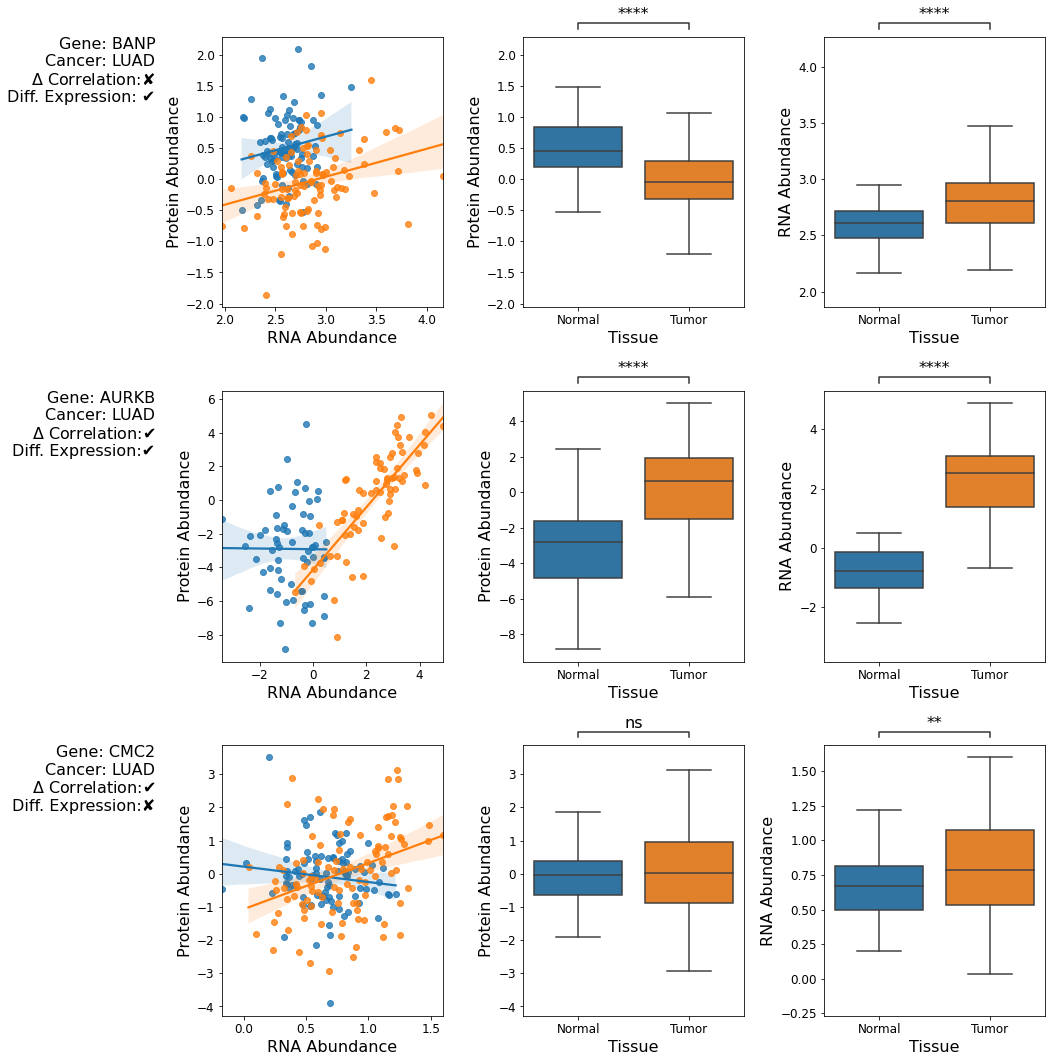

In [37]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))
plt.subplots_adjust(hspace = 0.3)
i = 0
for gene, s in zip(genes, notes):
    gene_df = df[df.Gene == gene]
    trans_pval = diff_trans[diff_trans.Gene == gene].FDR
    trans_pval = np.array(trans_pval)
    prot_pval = diff_prot[diff_prot.Gene == gene].FDR
    prot_pval = np.array(prot_pval)
    plt.sca(ax[i][0])
    plt.gca().text(-0.3, 1, s, transform = plt.gca().transAxes, 
                 fontsize = 16, va = 'top', ha = 'right')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Normal'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    sns.regplot(data = gene_df[gene_df.Tissue == 'Tumor'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    plt.sca(ax[i][1])
    g = sns.boxplot(data = gene_df, x = 'Tissue', y = 'Protein Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g, data=df, x='Tissue', y='Protein Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = prot_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    plt.sca(ax[i][2])
    g2 = sns.boxplot(data = gene_df, x = 'Tissue', y = 'RNA Abundance', order = ['Normal', 'Tumor'], fliersize = 0)
    test_results = add_stat_annotation(g2, data=df, x='Tissue', y='RNA Abundance', order = ['Normal', 'Tumor'],
                                   box_pairs=[('Normal', 'Tumor')],
                                   pvalues = trans_pval, text_format='star',
                                   loc='outside', perform_stat_test=False, verbose = False)
    i += 1

fig.tight_layout()
plt.savefig('Figures/Figure 2) Correlation vs Differential Expression.png')

In [36]:
dc = pd.read_csv('data/delta_correlation_df.csv')
dc = dc[dc.Cancer == 'LUAD']
dc[dc.Gene.isin(genes)]

,Gene,Delta_Correlation,P_Value,FDR,Cancer
41061,AURKB,0.803304,9.779486e-16,1.068098e-14,LUAD
41100,BANP,0.140860,3.478911e-01,4.180933e-01,LUAD
42020,CMC2,0.482246,1.458415e-03,3.197514e-03,LUAD
